In [1]:
from arcgis.gis import GIS
gis = GIS(profile = "your_online_profile")

# The SeDF

Good afternoon folks. I'm assuming many of you have heard of the Spatially Enabled DataFrame (SeDF), but for those that haven't, we're going to first give you a brief introduction into what it is, before going over how you can use it with a variety of data sources to accomplish a variety of handy things. Buckle up!

## What is the Spatially Enabled DataFrame, and how is it different from a normal DataFrame?

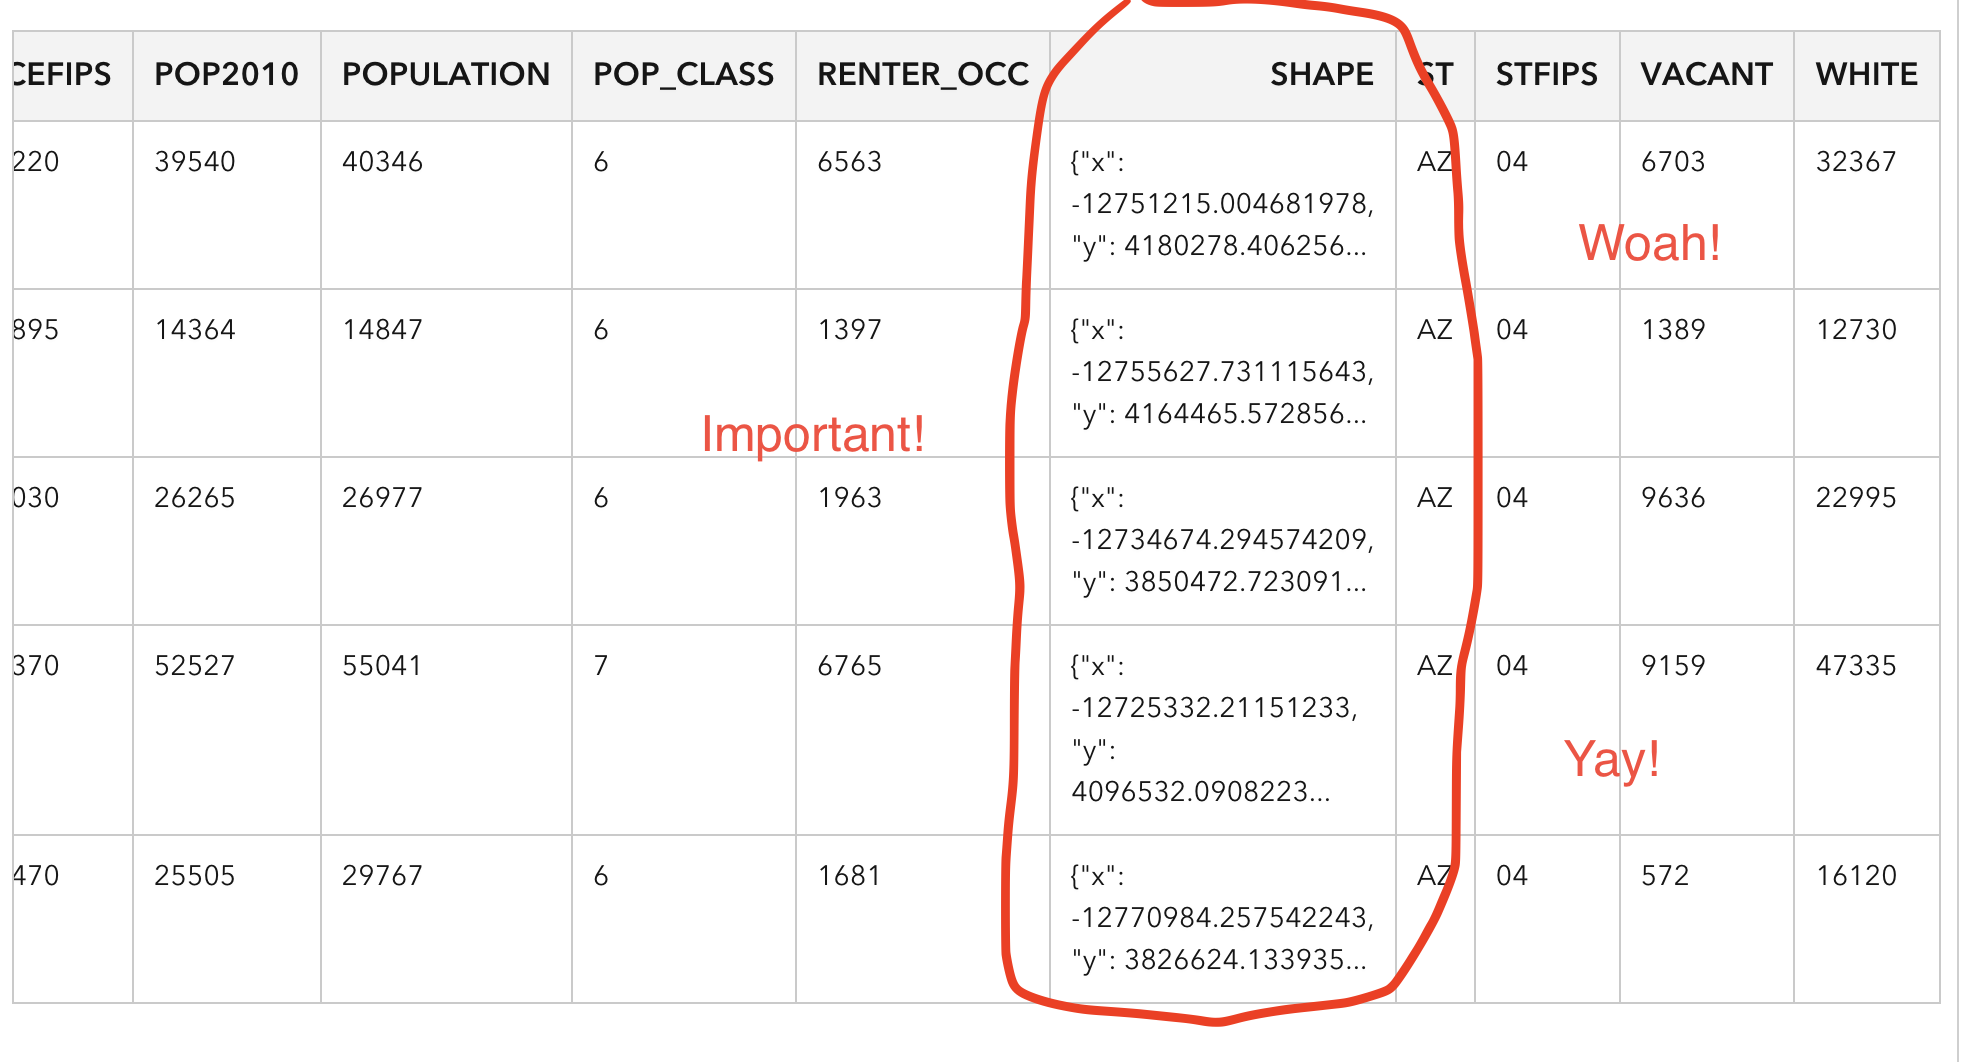

To understand the Spatially Enabled DataFrame, it's important to first take a look at a Pandas DataFrame. Pandas is one of the most commonly used libraries in Python, and DataFrames are a very helpful tool in the reportoire of any data scientist or analyst. They're two-dimensional, size-mutable tabular data structures that are easily traversable through Python code. You can think of them as data tables or Excel spreadsheets that allow you to run SQL-esque operations on them. Each row represents the data a single feature, and each column represents an attribute of that feature.

The main difference between a normal DataFrame and one of the ArcGIS API for Python's Spatially Enabled DataFrames is the addition of the `SHAPE` column. The `SHAPE` column adds geometry to each feature, providing compatibility with all sorts of functions in the ArcGIS sphere and allowing for easy execution of spatial operations. The SeDF is compatible with `ArcPy`, `pyshp`, `shapely`, and `fiona`, meaning that you should be able to use it with whatever sort of geometry engine you have in your environment. 

For those of you following along or reading this notebook after-the-fact, you can learn more about them here: https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/

## The `GeoAccessor` class and `.spatial` namespace

All of the functions associated with a SeDF can be found in the Python API's `GeoAccessor` class; however, you'll rarely be calling that class by name. The Python API essentially adds in this class as a namespace onto a normal Pandas DataFrame, meaning you can access all of its functions by adding `.spatial` to a DataFrame. We'll give you a visual representation of this below.

Read more here: https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#geoaccessor

In [2]:
from arcgis.features import GeoAccessor
import pandas as pd

In [3]:
pd.DataFrame.spatial?

Pretty neat, huh? Now that we've covered the nitty gritty of what a SeDF is and how the syntax of it works, let's take a look at how you can read data into one and start doing cool stuff with it.

## Reading data into a SeDF

SeDF's can be generated from a variety of sources, including normal DataFrames, Feature Layers (and queries on them), Feature Classes (File GeoDataBases!), and even other things like feather objects and arrow tables; the full list can be found under the GeoAccessor documentation.

We'll take a look at a couple really common workflows- starting from a feature layer, and starting from a CSV file.

### Feature Layer using `from_layer()`

<Item title:"Tornadoes" type:Feature Layer Collection owner:Federal_User_Community>
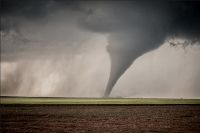

In [4]:
# We will be using a Living Atlas feature layer showing tornadoes in the US
tornadoes = gis.content.get("0db253f3e83a4c5f9f5ab9577f2dcb49")
tornadoes

In [5]:
tornadoes.layers

[<FeatureLayer url:"https://services2.arcgis.com/FiaPA4ga0iQKduv3/arcgis/rest/services/Tornadoes_1950_2017_1/FeatureServer/0">]

In [6]:
t_df = pd.DataFrame.spatial.from_layer(tornadoes.layers[0])
t_df

,Date_Calc,FID,Month_Calc,SHAPE,closs,date,dy,elat,elon,fat,...,om,slat,slon,st,stf,stn,time,tz,wid,yr
0,1954-07-09 04:00:00,1,6,"{""x"": -9926358.994036203, ""y"": 3806706.6330996...",0.0,1954-07-09,9.0,32.3301,-89.1699,0.0,...,417.0,32.33,-89.17,MS,28.0,11.0,09:00:00,3.0,10.0,1954.0
1,1954-07-09 04:00:00,2,6,"{""x"": -11822129.922245653, ""y"": 6215681.042900...",0.0,1954-07-09,9.0,48.6501,-106.1999,0.0,...,418.0,48.65,-106.2,MT,30.0,2.0,23:00:00,3.0,73.0,1954.0
2,1954-08-11 04:00:00,3,7,"{""x"": -8946747.475055397, ""y"": 3173535.9663250...",0.0,1954-08-11,11.0,27.4001,-80.3699,0.0,...,462.0,27.4,-80.37,FL,12.0,9.0,12:00:00,3.0,17.0,1954.0
3,1954-08-11 04:00:00,4,7,"{""x"": -7571951.7637584675, ""y"": 5945339.192693...",0.0,1954-08-11,11.0,47.0201,-68.0199,1.0,...,463.0,47.02,-68.02,ME,23.0,2.0,17:27:00,3.0,27.0,1954.0
4,1954-08-12 04:00:00,5,7,"{""x"": -9169386.456641944, ""y"": 5074490.3484855...",0.0,1954-08-12,12.0,41.4201,-82.3699,0.0,...,464.0,41.42,-82.37,OH,39.0,10.0,17:00:00,3.0,10.0,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66239,2020-09-01 04:00:00,66240,8,"{""x"": -11225390.65989923, ""y"": 4105679.4334943...",0.0,2020-09-01,1.0,34.5706,-100.8394,0.0,...,619522.0,34.5706,-100.8394,TX,48.0,0.0,18:10:00,3.0,30.0,2020.0
66240,2020-09-03 04:00:00,66241,8,"{""x"": -8523677.75029556, ""y"": 4714225.75350413...",0.0,2020-09-03,3.0,38.9233,-76.4615,0.0,...,619523.0,38.948,-76.5695,MD,24.0,0.0,15:57:00,3.0,100.0,2020.0
66241,2020-09-05 04:00:00,66242,8,"{""x"": -13284868.031269269, ""y"": 4488005.209215...",0.0,2020-09-05,5.0,37.5218,-119.3056,0.0,...,619524.0,37.35,-119.34,CA,6.0,0.0,16:17:00,3.0,50.0,2020.0
66242,2020-09-05 04:00:00,66243,8,"{""x"": -13269283.302558212, ""y"": 4474011.088229...",0.0,2020-09-05,5.0,37.2598,-119.1838,0.0,...,619525.0,37.25,-119.2,CA,6.0,0.0,18:29:00,3.0,25.0,2020.0


Splendid. Absolutely splendid.

### Query results as a SeDF

This is a small little trick you can do also- note that this is a slightly different syntax, but it works the same. We'll run a query to just get the tornadoes that are in California.

In [7]:
ca_tornadoes = tornadoes.layers[0].query(where="st = 'CA'").sdf
ca_tornadoes

,FID,om,yr,mo,dy,date,time,tz,st,stf,...,slat,slon,elat,elon,len,wid,fc,Month_Calc,Date_Calc,SHAPE
0,119,3.0,1955.0,1.0,18.0,1955-01-18,13:01:00,3.0,CA,6.0,...,34.05,-118.3,34.0501,-118.2999,3.0,23.0,1.0,0,1955-01-18 05:00:00,"{""x"": -13169095.760844262, ""y"": 4035517.782084..."
1,184,88.0,1955.0,4.0,18.0,1955-04-18,14:00:00,3.0,CA,6.0,...,37.3,-120.25,37.3001,-120.2499,0.1,10.0,1.0,3,1955-04-18 05:00:00,"{""x"": -13386168.767891146, ""y"": 4481005.822925..."
2,266,71.0,1955.0,4.0,6.0,1955-04-06,15:30:00,3.0,CA,6.0,...,34.0,-117.25,34.0001,-117.2499,1.0,50.0,1.0,3,1955-04-06 05:00:00,"{""x"": -13052210.295511328, ""y"": 4028802.026134..."
3,434,101.0,1953.0,4.0,27.0,1953-04-27,15:15:00,3.0,CA,6.0,...,37.65,-121.0,37.6501,-120.9999,0.1,10.0,0.0,3,1953-04-27 04:00:00,"{""x"": -13469658.385986103, ""y"": 4530099.858111..."
4,502,182.0,1953.0,5.0,19.0,1953-05-19,15:30:00,3.0,CA,6.0,...,39.75,-122.18,39.7501,-122.1799,2.0,10.0,0.0,4,1953-05-19 04:00:00,"{""x"": -13601015.385122165, ""y"": 4829679.189776..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,66056,619433.0,2020.0,8.0,14.0,2020-08-14,14:30:00,3.0,CA,6.0,...,39.7313,-120.1284,39.7301,-120.1209,0.43,137.0,0.0,7,2020-08-14 04:00:00,"{""x"": -13372632.317810684, ""y"": 4826972.011330..."
454,66088,619465.0,2020.0,8.0,15.0,2020-08-15,15:04:00,3.0,CA,6.0,...,39.7239,-120.1303,39.7226,-120.1299,0.09,20.0,0.0,7,2020-08-15 04:00:00,"{""x"": -13372843.824843192, ""y"": 4825900.924275..."
455,66089,619466.0,2020.0,8.0,15.0,2020-08-15,15:41:00,3.0,CA,6.0,...,39.731,-120.1009,39.7615,-120.0565,3.16,156.0,0.0,7,2020-08-15 04:00:00,"{""x"": -13369571.031813871, ""y"": 4826928.586646..."
456,66242,619524.0,2020.0,9.0,5.0,2020-09-05,16:17:00,3.0,CA,6.0,...,37.35,-119.34,37.5218,-119.3056,12.02,50.0,0.0,8,2020-09-05 04:00:00,"{""x"": -13284868.031269269, ""y"": 4488005.209215..."


### Starting from a CSV file

Now, say you have a CSV file containing a table of data you'd like to explore further. We can use pandas to put that data into a DataFrame, and then convert that DataFrame into a SeDF using the `from_xy()` method. We'll be using a collection of airport data.

In [8]:
df = pd.read_csv("/Users/cowboy/Downloads/airports.csv")
df

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228
...,...,...,...,...,...,...,...
336,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824
337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811
339,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226


Obviously, this is just a normal DataFrame. How do we convert this non-geometric data to something we can run spatial operations on? We do this with the `from_xy` function- we just have to tell the function which two columns correspond to the spatial properties. This may come as a shock to some of you, but we'll be using the LATITUDE and LONGITUDE columns.

In [9]:
df.get("LATITUDE")

0      35.040222
1      61.174320
2      33.640444
3      30.194533
4      41.938874
         ...    
336    56.484326
337    44.688399
338    36.281869
339    59.503361
340    32.656583
Name: LATITUDE, Length: 341, dtype: float64

In [10]:
df.get("LONGITUDE")

0     -106.609194
1     -149.996186
2      -84.426944
3      -97.669872
4      -72.683228
          ...    
336   -132.369824
337   -111.117638
338    -94.306811
339   -139.660226
340   -114.605972
Name: LONGITUDE, Length: 341, dtype: float64

In [11]:
a_sedf = pd.DataFrame.spatial.from_xy(df = df, x_column = "LONGITUDE", y_column = "LATITUDE")
a_sedf

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,SHAPE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,"{""spatialReference"": {""wkid"": 4326}, ""x"": -106..."
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,"{""spatialReference"": {""wkid"": 4326}, ""x"": -149..."
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,"{""spatialReference"": {""wkid"": 4326}, ""x"": -84...."
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,"{""spatialReference"": {""wkid"": 4326}, ""x"": -97...."
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,"{""spatialReference"": {""wkid"": 4326}, ""x"": -72...."
...,...,...,...,...,...,...,...,...
336,WRG,Wrangell,Wrangell,AK,USA,56.484326,-132.369824,"{""spatialReference"": {""wkid"": 4326}, ""x"": -132..."
337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638,"{""spatialReference"": {""wkid"": 4326}, ""x"": -111..."
338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811,"{""spatialReference"": {""wkid"": 4326}, ""x"": -94...."
339,YAK,Yakutat,Yakutat,AK,USA,59.503361,-139.660226,"{""spatialReference"": {""wkid"": 4326}, ""x"": -139..."


In [12]:
a_sedf.columns

Index(['IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
       'SHAPE'],
      dtype='object')

And just like that, what was a boring CSV file just a couple lines of code ago is now a bundle of spatial magic.

## Using the Data

Now that we have our data in a useful format for spatial operations, we'll start to explore the things we can do with it. In this notebook, we'll take a look at how SeDF's can be used to engineer and plot data; Manushi will expand on some more advanced workflows in the next one. 

### Plotting

Now, it's quite obvious that one of the best ways to view geographic data is by putting it on a map; luckily, the SeDF lets us do that super easily with the `plot()` method.

If we were to dig into the specs of a Web Map, we'd find that very layer has an underlying JSON structure, complete with a renderer section that dictates how the data points are visually represented. The `plot` method essentially converts the data into a renderer JSON dict and adds it to the selected map; once added, a user would need to save the WebMap in order for those changes to become part of a permanent portal item.

Here, we're going to use the `plot` method to view the data in our airport SeDF in a few different ways before deciding on the one we want to save to the portal as a Feature Layer.

In [13]:
# first, we create our map
map1 = gis.map(location="USA", zoomlevel = 4)
map1

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
# let's start by just getting a basic representation of all our data points
map1.remove_layers()
a_sedf.spatial.plot(
    map_widget=map1, # target our map widget
    colors='viridis',
    renderer_type="u", # stands for simple renderer
    marker_size=6, # a couple slight alterations on symbol look
    col = 'STATE',
    line_width=0.5,
)

True

In [15]:
# now, we can do a heatmap- might be interesting to see where they're bunched
map1.remove_layers()
a_sedf.spatial.plot(
    map_widget=map1, # target our map widget
    renderer_type="h", # stands for heatmap renderer
)

True

### Cleaning and Exporting

Say we have a subset of this data that we want to examine- we'll be narcissistic here and say only the airports in California and Oregon. Pandas allows us to easily pick apart a DataFrame into what we want to see.

In [16]:
bad_df = df[(a_sedf['STATE'] != 'CA') & (a_sedf['STATE'] != 'OR')].index
a_sedf.drop(bad_df, inplace=True)

In [17]:
a_sedf.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,SHAPE
9,BUR,Burbank-Glendale-Pasadena,Burbank,CA,USA,34.200619,-118.358497,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
32,LAX,Los Angeles International,Los Angeles,CA,USA,33.942536,-118.408074,"{""spatialReference"": {""wkid"": 4326}, ""x"": -118..."
43,OAK,Metropolitan Oakland International,Oakland,CA,USA,37.721291,-122.220717,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."
47,ONT,Ontario International,Ontario,CA,USA,34.056000,-117.601194,"{""spatialReference"": {""wkid"": 4326}, ""x"": -117..."
51,PDX,Portland Intl,Portland,OR,USA,45.588722,-122.597500,"{""spatialReference"": {""wkid"": 4326}, ""x"": -122..."


There are plenty of other ways we can manipulate and parse our data, but we'll stick with this basic example for the sake of time. One thing of note is that the `.spatial` namespace does have one thing to help out with this process- `sanitize_column_names()`, which cleans up column names (converts them to strings, removes special characters, renaming blank columns, etc.) Our column names look good, so we'll skip over this method for now.

Now, we'll save this amended dataframe as a feature layer, so we can keep it in our GIS and run analysis on it later if we want. There are also options to save as a feature set, feature collection, and more.

In [19]:
a_fl = a_sedf.spatial.to_featurelayer(title="CA/OR Airports")

In [20]:
a_fl

<Item title:"CA/OR Airports" type:Feature Layer Collection owner:nparavicini_geosaurus>

Boom! There's a quick introduction into how you can read all sorts of data into a DataFrame, perform both normal DataFrame operations and spatially-oriented operations on it, and store it in your portal for the days to come. Manushi will expand further on some other helpful things you can do with SeDF's.